## Guided Project: Cleaning and Analysing Employee Exit Surveys

In this project, I'm working with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The main questions are:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [4]:
dete_survey["SeparationType"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [5]:
dete_survey["Cease Date"].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
08/2012         2
02/2014         2
04/2013         2
04/2014         2
07/2014         2
09/2010         1
07/2012         1
07/2006         1
09/2014         1
2010            1
2014            1
11/2012         1
Name: Cease Date, dtype: int64

In [6]:
dete_survey["DETE Start Date"].value_counts()

Not Stated    73
2011          40
2007          34
2008          31
2010          27
2012          27
2009          24
2006          23
1975          21
2013          21
1970          21
2005          20
1990          20
1999          19
1996          19
1991          18
2000          18
1992          18
2004          18
1989          17
1988          15
1976          15
1978          15
2002          15
2003          15
1995          14
1979          14
1997          14
1998          14
1974          14
1980          14
1993          13
1986          12
1972          12
1977          11
1984          10
1971          10
1994          10
1969          10
2001          10
1981           9
1983           9
1985           8
1973           8
1987           7
1963           4
1982           4
1968           3
1967           2
1965           1
1966           1
Name: DETE Start Date, dtype: int64

In [7]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [9]:
tafe_survey["Reason for ceasing employment"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [10]:
tafe_survey["LengthofServiceOverall. Overall Length of Service at Institute (in years)"].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

#### Observations
There's quite a bit of missing data. The column labeling in the tafe survey is not the best.
I'll reread the `dete_survey.csv` since the `Not Stated` should be read as `NaN`.

In [11]:
dete_survey = pd.read_csv("dete_survey.csv",na_values="Not Stated")

I'll drop some of the not needed columns.

In [12]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In [13]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [14]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [15]:
renameDict = {'Record ID': 'id',
              'CESSATION YEAR': 'cease_date',
              'Reason for ceasing employment': 'separationtype',
              'Gender. What is your Gender?': 'gender',
              'CurrentAge. Current Age': 'age',
              'Employment Type. Employment Type': 'employment_status',
              'Classification. Classification': 'position',
              'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
              'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
             }
tafe_survey_updated = tafe_survey_updated.rename(renameDict,axis='columns')



In [16]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [17]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Since I'll be comparing these two data sets and joining the dataframes, I want to synchronise the column names.

In [18]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [19]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [20]:
dete_resignations = dete_survey_updated.loc[
    (dete_survey_updated["separationtype"]=="Resignation-Other reasons") | 
    (dete_survey_updated["separationtype"]=="Resignation-Other employer") | 
    (dete_survey_updated["separationtype"]=="Resignation-Move overseas/interstate")
].copy()

In [21]:
tafe_resignations = tafe_survey_updated.loc[
    tafe_survey_updated["separationtype"]=="Resignation"
].copy()

Since the `dete_survey_updated` has subcategories for resignation, it is necesarry to include all of them to be able to compare with the `tafe_survey_updated`.

In [22]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [23]:
# Removing the months and converting the years from int64 to float
dete_resignations["cease_date"] = dete_resignations["cease_date"].str[-4:].astype('float')

In [24]:
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [25]:
dete_resignations["dete_start_date"].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [26]:
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

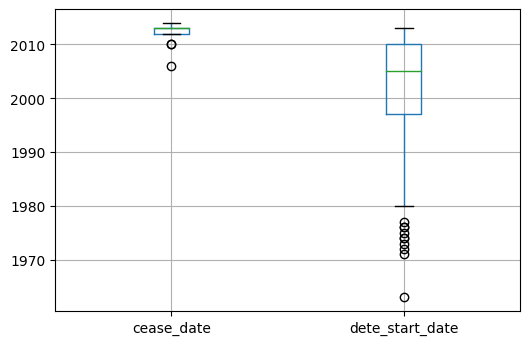

In [27]:
%matplotlib inline  
dete_resignations.boxplot(column=["cease_date","dete_start_date"])

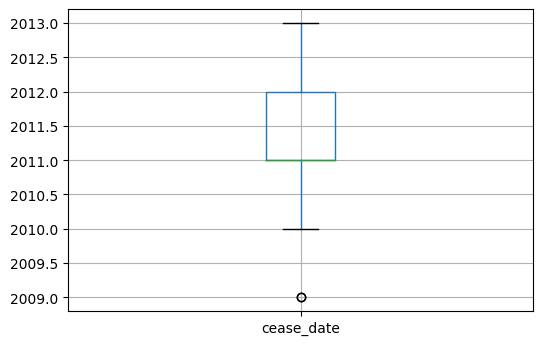

In [28]:
tafe_resignations.boxplot(column="cease_date")

Nothing too unusual here. There are a few employes which started working a long time ago. In addition, it seems that the data collected here started from 2009 for `tafe` and 2006 for `dete`.

In [29]:
dete_resignations['institute_service'] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

Since there was no `institute_service` column in `dete_resignations` I created it by subtraction the end date of employment with the start date.

### Identifying DIssatisfied Employees

In [30]:
# Columns used to categorize employees as "dissatisfied"
tafe_columns_to_apply = ["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]
dete_columns_to_apply = ["job_dissatisfaction","dissatisfaction_with_the_department","physical_work_environment","lack_of_recognition","lack_of_job_security","work_location","employment_conditions","work_life_balance","workload"]


In [31]:
def update_vals(value):
    if pd.isnull(value):
        output = np.nan
    elif value == '-':
        output = False
    else:
        output = True
    return output

In [32]:
# Convert values for both columns
for col in tafe_columns_to_apply:
    tafe_resignations[col] = tafe_resignations[col].map(update_vals)


In [33]:
dete_resignations['dissatisfied'] = dete_resignations[dete_columns_to_apply].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_columns_to_apply].any(axis=1, skipna=False)

### Combine the Data

In [34]:
dete_resignations["institute"] = "DETE"
tafe_resignations["institute"] = "TAFE"

combined = pd.concat([dete_resignations,tafe_resignations])

In [35]:
# Drop any column with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

I added an institute label to each dataset before concatenation so that I can easily compare them.

### Cleaning the Service Column

In [40]:
# Convert to string
combined_updated["institute_service"] = combined_updated["institute_service"].astype('str')

In [42]:
# Take out the first digit
combined_updated['institute_service_up'] = combined_updated['institute_service'].str.extract(r'(\d+)')

In [46]:
# Convert to float
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

In [47]:
def careerStage(val):
    if pd.isnull(val):
        return np.nan
    elif val >= 11:
        return "Sage"
    elif 7 <= val < 11:
        return "Tenured"
    elif 3 <= val < 7:
        return "Sophomore"
    else:
        return "Newbie"

combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(careerStage)

In [49]:
combined_updated["service_cat"].value_counts()

Newbie       193
Sophomore    172
Sage         136
Tenured       62
Name: service_cat, dtype: int64

Understanding employee's needs according to career stage instead of age is more effective. Therefore, I converted the service time to the four categories of career stage based on this article: https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage

### Performing Initial Analysis

In [51]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [52]:
# Replace the missing values with the the most common value
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

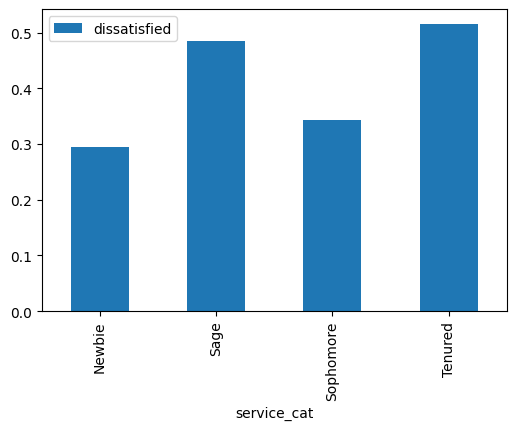

In [58]:
combined_updated.pivot_table("dissatisfied","service_cat").plot(kind="bar")

It seems that as the most dissatisfied employees which quit are in the `Tenured` category, steadily increasing from `Newbie`.